<a href="https://colab.research.google.com/github/skarot/SentimentAnalysis/blob/main/MLImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using:
1. ML
2. DL - LSTM and RNN

## Use Case

A leading learning and development group recently moved from offline teaching to online teaching due to pandemic situation. The students gave a survey on teaching, course content, exams, labs, library facilities and extra curricular activities. 
The task is to understand the underlying sentiment from the feedback on various areas and then provide a cumulative view. 

## Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sb


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, LSTM, Embedding
from keras.models import sequential

## Load data

In [3]:
df = pd.read_excel('StudentFeedback.xlsx')

## EDA

In [4]:
df.shape

(185, 12)

In [5]:
df.columns

Index(['teaching', 'teaching.1', 'coursecontent', 'coursecontent.1',
       'examination', 'Examination', 'labwork', 'labwork.1',
       'library_facilities', ' library_facilities', 'extracurricular',
       'extracurricular.1'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             185 non-null    int64  
 1   teaching.1           185 non-null    object 
 2   coursecontent        184 non-null    float64
 3   coursecontent.1      185 non-null    object 
 4   examination          184 non-null    float64
 5   Examination          185 non-null    object 
 6   labwork              185 non-null    int64  
 7   labwork.1            185 non-null    object 
 8   library_facilities   182 non-null    float64
 9    library_facilities  185 non-null    object 
 10  extracurricular      185 non-null    int64  
 11  extracurricular.1    185 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 17.5+ KB


In [7]:
df.head(5)

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


## Preprocessing

There are 2 columns with same name 'library_facilities'. Rename one of them based on index.



In [8]:

df = df.rename(columns = {df.columns[8]:'library_facilities_sentiment_score'})

Lets rename the columns for better understanding.


In [9]:
df = df.rename(columns = {
    'teaching':'teaching_sentiment_score',
    'teaching.1':'teaching_review',
    'coursecontent':'coursecontent_sentiment_score',
    'coursecontent.1':'coursecontent_review',
    'examination':'examination_sentiment_score',
    'Examination':'examination_review',
    'labwork':'labwork_sentiment_score',
    'labwork.1':'labwork_review',
    ' library_facilities':'library_facilities_review',
    'extracurricular':'extracurricular_sentiment_score',
    'extracurricular.1':'extracurricular_review'  
})

In [10]:
df.head(5)

,teaching_sentiment_score,teaching_review,coursecontent_sentiment_score,coursecontent_review,examination_sentiment_score,examination_review,labwork_sentiment_score,labwork_review,library_facilities_sentiment_score,library_facilities_review,extracurricular_sentiment_score,extracurricular_review
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


## Fix uniform datatype for score as float.

Fisrt we create a copy of original dataframe and run the preprocesssing on the copy.

In [11]:
df_processed  = df.copy()

In [12]:
df_processed['teaching_sentiment_score'] = df_processed['teaching_sentiment_score'].astype(float)


In [13]:
df_processed['labwork_sentiment_score'] = df_processed['labwork_sentiment_score'].astype(float)
df_processed['extracurricular_sentiment_score'] = df_processed['extracurricular_sentiment_score'].astype(float)

In [14]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   teaching_sentiment_score            185 non-null    float64
 1   teaching_review                     185 non-null    object 
 2   coursecontent_sentiment_score       184 non-null    float64
 3   coursecontent_review                185 non-null    object 
 4   examination_sentiment_score         184 non-null    float64
 5   examination_review                  185 non-null    object 
 6   labwork_sentiment_score             185 non-null    float64
 7   labwork_review                      185 non-null    object 
 8   library_facilities_sentiment_score  182 non-null    float64
 9   library_facilities_review           185 non-null    object 
 10  extracurricular_sentiment_score     185 non-null    float64
 11  extracurricular_review              185 non-n

Good! all columns have uniform datatype

## Handling Nan

In [15]:
df_processed.isnull().sum()

teaching_sentiment_score              0
teaching_review                       0
coursecontent_sentiment_score         1
coursecontent_review                  0
examination_sentiment_score           1
examination_review                    0
labwork_sentiment_score               0
labwork_review                        0
library_facilities_sentiment_score    3
library_facilities_review             0
extracurricular_sentiment_score       0
extracurricular_review                0
dtype: int64

coursecontent_sentiment_score, examination_sentiment_score has 1 null value and library_facilities_sentiment_score has 3 null values. Since the total number of records are less, deleteing the record will not be a good solution. So, lets impute the score based on other features for same record.

In [16]:
#tst = df_processed[df_processed['coursecontent_sentiment_score'].isnull()]

In [17]:
# ASK ??

In [18]:
#tstdrop = tst.drop(columns= ['teaching_review','coursecontent_review','examination_review','labwork_review','library_facilities_review','extracurricular_review'])

In [19]:
#tstdrop.pivot(columns=['newcol'],index=['teaching_sentiment_score','coursecontent_sentiment_score','examination_sentiment_score','labwork_sentiment_score','library_facilities_sentiment_score','extracurricular_sentiment_score'])

In [20]:
#tyt = tstdrop.pivot(columns=['teaching_sentiment_score','labwork_sentiment_score','examination_sentiment_score','library_facilities_sentiment_score','extracurricular_sentiment_score'])

In [21]:
#tyt = tstdrop.pivot(columns=['teaching_sentiment_score','labwork_sentiment_score','examination_sentiment_score','library_facilities_sentiment_score','extracurricular_sentiment_score'])

In [22]:
# replace Nan with value that apprears before that record using ffill
df_processed = df_processed.ffill()


In [23]:
df_processed.isnull().sum()

teaching_sentiment_score              0
teaching_review                       0
coursecontent_sentiment_score         0
coursecontent_review                  0
examination_sentiment_score           0
examination_review                    0
labwork_sentiment_score               0
labwork_review                        0
library_facilities_sentiment_score    0
library_facilities_review             0
extracurricular_sentiment_score       0
extracurricular_review                0
dtype: int64

First Let us start with one feature, say teaching. Column 'teaching' will be target column while 'teaching.1' will be predictor.

## Feature Selection for target and predictor

In [24]:
X = df_processed['teaching_review']
y = df_processed['teaching_sentiment_score']

## Cleaning text

In [25]:
import re
import string
def clean_text(text):
  text = str(text).lower()
  re.sub('\w+\d+\w','',text)
  re.sub('\n','',text)
  re.sub('[%s]' % re.escape(string.punctuation),'',text)
  ## ASK - can be replaced with tokenization??
  return text


In [26]:
X = X.apply(lambda x: clean_text(x))

In [27]:
X

0      teacher are punctual but they should also give...
1                                                  good 
2      excellent lectures are delivered by teachers a...
3                                                   good
4      teachers give us all the information required ...
                             ...                        
180    intraction is good and leacture delivery also ...
181    all the given terms are good regarding the uni...
182    all the terms are good regarding the universit...
183    some of the teacher are un experienced. also t...
184                                     it is going good
Name: teaching_review, Length: 185, dtype: object

## Remove stop words

In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [30]:
def remove_stop_words(text):
  word_list = str(text).split(" ")
  words = [str(word) for word in word_list if not word in stop_words]
  return words



In [31]:
X =  X.apply(lambda x : remove_stop_words(x))

In [32]:
X

0      [teacher, punctual, also, give, us, practical,...
1                                               [good, ]
2      [excellent, lectures, delivered, teachers, tea...
3                                                 [good]
4      [teachers, give, us, information, required, im...
                             ...                        
180    [intraction, good, leacture, delivery, also, g...
181        [given, terms, good, regarding, university, ]
182    [terms, good, regarding, university, activities.]
183    [teacher, un, experienced., also, unfair, bais...
184                                        [going, good]
Name: teaching_review, Length: 185, dtype: object

TODO - visualization

## Stemming

In [33]:
"""from nltk import PorterStemmer
ps = PorterStemmer()
def stem_word(review):
  review_stem = []
  for word in review:
    word = ps.stem(word)
    review_stem.append(word)
  return review_stem"""

'from nltk import PorterStemmer\nps = PorterStemmer()\ndef stem_word(review):\n  review_stem = []\n  for word in review:\n    word = ps.stem(word)\n    review_stem.append(word)\n  return review_stem'

In [34]:
#X = X.apply(lambda x: stem_word(x))

In [35]:
X

0      [teacher, punctual, also, give, us, practical,...
1                                               [good, ]
2      [excellent, lectures, delivered, teachers, tea...
3                                                 [good]
4      [teachers, give, us, information, required, im...
                             ...                        
180    [intraction, good, leacture, delivery, also, g...
181        [given, terms, good, regarding, university, ]
182    [terms, good, regarding, university, activities.]
183    [teacher, un, experienced., also, unfair, bais...
184                                        [going, good]
Name: teaching_review, Length: 185, dtype: object

As we can see that some words aftr stemming have lost their meaning like lectur, deliv etc. So lematizing should be a better step.

## Lemmatization

In [36]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def lemmatize_word(review):
  lemmatized_review = []
  for word in review:
    lemmatized_review.append(lemmatizer.lemmatize(word))
  return lemmatized_review



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [37]:
X = X.apply(lambda x: lemmatize_word(x))

In [38]:
X

0      [teacher, punctual, also, give, u, practical, ...
1                                               [good, ]
2      [excellent, lecture, delivered, teacher, teach...
3                                                 [good]
4      [teacher, give, u, information, required, impr...
                             ...                        
180    [intraction, good, leacture, delivery, also, g...
181         [given, term, good, regarding, university, ]
182     [term, good, regarding, university, activities.]
183    [teacher, un, experienced., also, unfair, bais...
184                                        [going, good]
Name: teaching_review, Length: 185, dtype: object

In [39]:
def convert_to_text(review):
  review_text = ''
  for word in review:
      review_text +=word
      review_text+=" "
  return review_text

In [40]:
X = X.apply(lambda x: convert_to_text(x))

In [41]:
X

0      teacher punctual also give u practical knowled...
1                                                 good  
2      excellent lecture delivered teacher teacher pu...
3                                                  good 
4      teacher give u information required improve pe...
                             ...                        
180    intraction good leacture delivery also good pu...
181               given term good regarding university  
182          term good regarding university activities. 
183    teacher un experienced. also unfair baised. in...
184                                          going good 
Name: teaching_review, Length: 185, dtype: object

Algorithms can handle only numbers and not text, so we need to convert the text into number matrix with TF-IDF.

# TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(2,2))

In [43]:
X = tfidf.fit_transform(X)

In [44]:
X.shape

(185, 582)

## Balance data

In [45]:
sentiment_vc = y.value_counts()

Text(0.5, 1.0, 'Data distribution for sentiments')

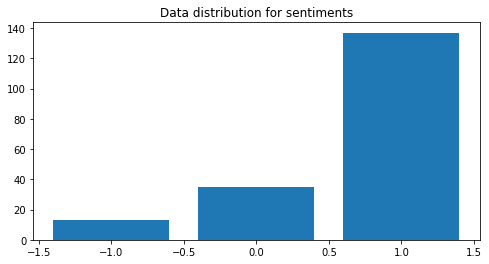

In [46]:
plt.figure(figsize = (8,4))
plt.bar(sentiment_vc.index, sentiment_vc.values)
plt.title('Data distribution for sentiments')

Clearly the data is imbalanced. We can use SMOTE - synthetic minority oversampling technique

## UpSampling with SMOTE

In [47]:
from imblearn.over_sampling import SMOTE
over_sampling = SMOTE(random_state=4)
X_over,y_over = over_sampling.fit_resample(X,y)

In [48]:
from collections import Counter
print(f'Original dataset shape {Counter(y)}')
print(f'Resampled dataset shape {Counter(y_over)}')

Original dataset shape Counter({1.0: 137, 0.0: 35, -1.0: 13})
Resampled dataset shape Counter({0.0: 137, 1.0: 137, -1.0: 137})


## Train Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=0)

## Model Building

We will create instances of all the available ML algo for supervised learning and review performance.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [51]:
lr_model = LogisticRegression(random_state=0)
knn_model = KNeighborsClassifier()
svc_model = SVC()
dt_model = DecisionTreeClassifier()
nb_model = BernoulliNB()

model_dict = {0:lr_model,1:knn_model,2:svc_model,3:dt_model, 4:nb_model}

Evauate each model on text data.

In [52]:
for key, model in model_dict.items():  
  score = cross_val_score(model,X_over,y_over,cv=10, scoring ='accuracy').mean()  
  print(f'{model} accuracy : {score}')

LogisticRegression(random_state=0) accuracy : 0.7860046457607432
KNeighborsClassifier() accuracy : 0.756678281068525
SVC() accuracy : 0.795760743321719
DecisionTreeClassifier() accuracy : 0.8322299651567946
BernoulliNB() accuracy : 0.8324041811846691


For GAusian Naive Bayes

In [53]:
"""from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
X_over_dense = np.asarray((X_over.todense())
score = cross_val_score(gnb_model,X_over_dense,y_over,cv=10, scoring ='accuracy').mean()  
print(score)"""

"from sklearn.naive_bayes import GaussianNB\ngnb_model = GaussianNB()\nX_over_dense = np.asarray((X_over.todense())\nscore = cross_val_score(gnb_model,X_over_dense,y_over,cv=10, scoring ='accuracy').mean()  \nprint(score)"

Decesion tree and Naive Bayes gave better results.

## Logistic Regression with Hyperparameter tuning

Let us evaluate with GridSearchCV hyperparameter tuning can we improve Logisticregression score.

We could increase the accuracy of logistricregression model ny 2% after hyperparameter tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

In [56]:
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)
print("accuracy :",best_model.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10000.0, 'penalty': 'l2'}
accuracy : 0.8115811739820202


In [ ]:
logreg = LogisticRegression(C=10000.0, random_state=0,solver='lbfgs', max_iter=60)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

LogisticRegression(C=10000.0, random_state=0)
The mean accuracy of the model is: 0.87

Accuracy of logistic regression classifier on test set: 0.87
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Fix pass value to lr object -> solver='lbfgs', max_iter=100

ASK- how to fix??

## Model Evaluation


In [58]:
cm = confusion_matrix(y_test,y_pred)

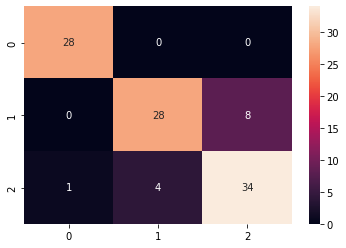

In [59]:
sb.heatmap(cm,annot=True, fmt="d",linecolor="white",)

ASK ? how to map to -1,0,1? or text?

# Implementation with LSTM and RNN

## Feature selection

In [ ]:
no_of_classes = y.nunique()
no_of_classes

## Tokenize

In [ ]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X))
X = tokenizer.texts_to_sequences(X)


In [ ]:
from keras.preprocessing import sequence
max_words = 30
X = sequence.pad_sequences(X, maxlen = max_words, padding = 'pre')

In [ ]:
X[99]

In [ ]:
y = np.asarray(y)

In [ ]:
y

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 4)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
no_of_classes,y

## Model creation

In [ ]:
input_dim = 10000
output_dim = 100
model = keras.Sequential()

model.add(Embedding(input_dim,output_dim, input_length = X_train.shape[1]))
model.add(LSTM(100, dropout = 0.2, return_sequences=True))
model.add(Dense(no_of_classes,activation = 'softmax'))

model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size = 75, epochs = 50,verbose=2)

In [ ]:
model